<a href="https://colab.research.google.com/github/ParnianH98/Classification/blob/main/classifying_breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from google.colab import files
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


خوانش فایل و لحاظ هدر برای فایل

In [ ]:
data = pd.read_csv(r'/gdrive/My Drive/AI HW/breast-cancer-wisconsin.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


تعداد داده‌های هر دسته یکسان نیست

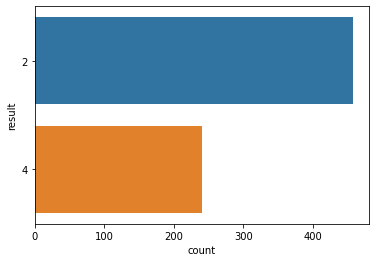

In [ ]:
data.columns = data.columns.astype(str)
data.rename(columns={'10':'result'}, inplace=True)
sns.countplot(y='result', data=data)

In [ ]:
data.result.value_counts()

2    458
4    241
Name: result, dtype: int64

باید تعداد دو دسته برابر باشد تا به مشکل منطقی نخوریم. برای این کار از up-sample minitory class استفاده می‌کنیم

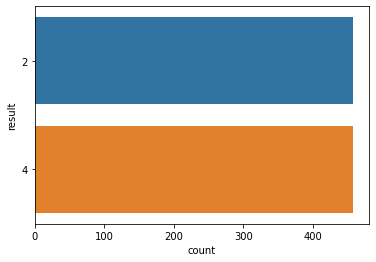

In [ ]:
data_majority = data[data.result == 2]
data_minitory = data[data.result == 4]
data_minority_upsampled = resample(data_minitory, replace=True, n_samples=458, random_state=123)
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
data_upsampled.result.value_counts()
data = data_upsampled
sns.countplot(y='result', data=data)

In [ ]:
data.replace('?',np.nan,inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,result
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
15,1047630,7,4,6,4,6,1,4,3,1,4
284,508234,7,4,5,10,2,10,3,8,2,4
236,1241559,10,8,8,2,8,10,4,8,10,4
282,488173,1,4,3,10,4,10,5,6,1,4


In [ ]:
data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6         19
7          0
8          0
9          0
result     0
dtype: int64

preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_features = scalar.fit_transform(data.drop('result', axis=1))
scaled_features

array([[-0.10169897, -0.03982001, -0.89830595, ..., -0.40352027,
        -0.77505014, -0.39617594],
       [-0.09649852, -0.03982001,  0.01427991, ..., -0.40352027,
        -0.48204728, -0.39617594],
       [-0.07427191, -0.70908837, -0.89830595, ..., -0.40352027,
        -0.77505014, -0.39617594],
       ...,
       [ 0.32846773,  1.63335091,  1.23106106, ..., -0.02363891,
         1.27596988,  4.30321181],
       [-1.01329603, -1.37835674,  0.01427991, ...,  0.35624246,
         0.68996416, -0.39617594],
       [-1.01329603, -1.37835674,  0.01427991, ...,  0.35624246,
         0.68996416, -0.39617594]])

normalize

In [ ]:
data_normalize = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_normalize

,0,1,2,3,4,5,6,7,8,9
0,-0.101699,-0.039820,-0.898306,-0.945058,-0.791322,-0.704617,-0.887942,-0.403520,-0.775050,-0.396176
1,-0.096499,-0.039820,0.014280,-0.017551,0.466554,1.374730,1.417737,-0.403520,-0.482047,-0.396176
2,-0.074272,-0.709088,-0.898306,-0.945058,-0.791322,-0.704617,-0.631755,-0.403520,-0.775050,-0.396176
3,-0.072755,0.294814,1.231061,1.219125,-0.791322,-0.288748,-0.119382,-0.403520,0.982967,-0.396176
4,-0.071426,-0.374454,-0.898306,-0.945058,-0.162384,-0.704617,-0.887942,-0.403520,-0.775050,-0.396176
...,...,...,...,...,...,...,...,...,...,...
911,-0.016916,0.629448,0.014280,0.600787,0.152085,0.958860,-0.887942,-0.023639,-0.189044,-0.396176
912,-0.977568,0.629448,0.014280,0.291618,2.038898,-0.704617,1.417737,-0.403520,1.275970,0.125978
913,0.328468,1.633351,1.231061,1.219125,-0.476853,1.790599,1.417737,-0.023639,1.275970,4.303212
914,-1.013296,-1.378357,0.014280,-0.326720,2.038898,0.127122,1.417737,0.356242,0.689964,-0.396176


In [ ]:
x=data.iloc[:,:].copy()
x.drop(columns=['result'],axis=1, inplace=True)
x

,0,1,2,3,4,5,6,7,8,9
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
15,1047630,7,4,6,4,6,1,4,3,1
284,508234,7,4,5,10,2,10,3,8,2
236,1241559,10,8,8,2,8,10,4,8,10
282,488173,1,4,3,10,4,10,5,6,1


In [ ]:
y=data.iloc[:,-1].copy()
y

0      2
1      2
2      2
3      2
4      2
      ..
15     4
284    4
236    4
282    4
282    4
Name: result, Length: 916, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer( n_neighbors=5)
x.iloc[:,:]=imputer.fit_transform(x.iloc[:,:])
x

,0,1,2,3,4,5,6,7,8,9
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15,1047630.0,7.0,4.0,6.0,4.0,6.0,1.0,4.0,3.0,1.0
284,508234.0,7.0,4.0,5.0,10.0,2.0,10.0,3.0,8.0,2.0
236,1241559.0,10.0,8.0,8.0,2.0,8.0,10.0,4.0,8.0,10.0
282,488173.0,1.0,4.0,3.0,10.0,4.0,10.0,5.0,6.0,1.0


tran test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train

,0,1,2,3,4,5,6,7,8,9
655,1326892.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
537,1116192.0,5.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0
481,1302428.0,5.0,3.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0
56,1112209.0,8.0,10.0,10.0,1.0,3.0,6.0,3.0,9.0,1.0
686,536708.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
304,653777.0,8.0,3.0,4.0,9.0,3.0,10.0,3.0,3.0,1.0
284,508234.0,7.0,4.0,5.0,10.0,2.0,10.0,3.0,8.0,2.0
541,1171578.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
549,1241035.0,7.0,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0


برای اجرای الگوریتم knn

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 85  57]
 [ 14 119]]


دقت با لحاظ 1 همسایه = 74 درصد

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.86      0.60      0.71       142
           4       0.68      0.89      0.77       133

    accuracy                           0.74       275
   macro avg       0.77      0.75      0.74       275
weighted avg       0.77      0.74      0.74       275



In [ ]:
knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[88 54]
 [62 71]]


دقت با لحاظ 10 همسایه = 58 درصد

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.59      0.62      0.60       142
           4       0.57      0.53      0.55       133

    accuracy                           0.58       275
   macro avg       0.58      0.58      0.58       275
weighted avg       0.58      0.58      0.58       275



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors':list(range(1,51)),'metric':['euclidean','manhattan','cosine']}

In [ ]:
grid=GridSearchCV(knn,param_grid,verbose=3,cv=5,scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.767, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.695, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.773, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.719, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.766, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.721, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... met

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=3, score=0.672, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.719, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.612, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.602, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.594, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.656, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.688, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
grid.best_params_

{'metric': 'cosine', 'n_neighbors': 1}

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,metric='cosine')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[131  11]
 [  3 130]]


و در نهایت بهترین تخمین برای مسئله با متریک‌های ارائه شده 95 درصد شد که درصد قابل قبولیست

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       142
           4       0.92      0.98      0.95       133

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[125  17]
 [  7 126]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.95      0.88      0.91       142
           4       0.88      0.95      0.91       133

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.92      0.91      0.91       275



بررسی حالت‌های مختلف

In [ ]:
param_grid={'solver':['liblinear','newton-cg','lbfgs','sag','saga'],'random_state':list(range(0,51))}

In [ ]:
grid=GridSearchCV(logreg,param_grid,verbose=3,cv=5,scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits
[CV] random_state=0, solver=liblinear ................................
[CV] .... random_state=0, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=0, solver=liblinear ................................
[CV] .... random_state=0, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=0, solver=liblinear ................................
[CV] .... random_state=0, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=0, solver=liblinear ................................
[CV] .... random_state=0, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=0, solver=liblinear ................................
[CV] .... random_state=0, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=0, solver=newton-cg ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  w

[CV] .... random_state=0, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=0, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=0, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=0, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=0, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=0, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=0, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=0, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=0, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=0, solver=lbfgs ....................................
[CV] ........ random_state=0, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=0, solver=lbfgs ....................................
[CV] ........ random_state=0, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=0, solver=lbfgs ....................................
[CV] ........ random_state=0, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=0, solver=lbfgs ....................................
[CV] ........ random_state=0, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=0, solver=lbfgs ....................................
[CV] ........ random_state=0, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=0, solver=sag ......................................
[CV] .......... random_state=0, solver=sag, score=0.496, total=   0.0s
[CV] random_state=0, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=0, solver=saga, score=0.492, total=   0.0s
[CV] random_state=0, solver=saga .....................................
[CV] ......... random_state=0, solver=saga, score=0.492, total=   0.0s
[CV] random_state=0, solver=saga .....................................
[CV] ......... random_state=0, solver=saga, score=0.492, total=   0.0s
[CV] random_state=0, solver=saga .....................................
[CV] ......... random_state=0, solver=saga, score=0.492, total=   0.0s
[CV] random_state=1, solver=liblinear ................................
[CV] .... random_state=1, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=1, solver=liblinear ................................
[CV] .... random_state=1, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=1, solver=liblinear ................................
[CV] .... random_state=1, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=1, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=1, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=1, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=1, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=1, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=1, solver=newton-cg, score=0.969, total=   0.4s
[CV] random_state=1, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=1, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=1, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=1, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=1, solver=lbfgs ....................................
[CV] ........ random_state=1, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=1, solver=lbfgs ....................................
[CV] ........ random_state=1, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=1, solver=lbfgs ....................................
[CV] ........ random_state=1, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=1, solver=lbfgs ....................................
[CV] ........ random_state=1, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=1, solver=lbfgs ....................................
[CV] ........ random_state=1, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=1, solver=sag ......................................
[CV] .......... random_state=1, solver=sag, score=0.496, total=   0.0s
[CV] random_state=1, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=1, solver=saga, score=0.492, total=   0.0s
[CV] random_state=1, solver=saga .....................................
[CV] ......... random_state=1, solver=saga, score=0.492, total=   0.0s
[CV] random_state=2, solver=liblinear ................................
[CV] .... random_state=2, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=2, solver=liblinear ................................
[CV] .... random_state=2, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=2, solver=liblinear ................................
[CV] .... random_state=2, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=2, solver=liblinear ................................
[CV] .... random_state=2, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=2, solver=liblinear ................................
[CV] .... random_state=2, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=2, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=2, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=2, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=2, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=2, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=2, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=2, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] .... random_state=2, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=2, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=2, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=2, solver=lbfgs ....................................
[CV] ........ random_state=2, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=2, solver=lbfgs ....................................
[CV] ........ random_state=2, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=2, solver=lbfgs ....................................
[CV] ........ random_state=2, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=2, solver=lbfgs ....................................
[CV] ........ random_state=2, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=2, solver=lbfgs ....................................
[CV] ........ random_state=2, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=2, solver=sag ......................................
[CV] .......... random_state=2, solver=sag, score=0.496, total=   0.0s
[CV] random_state=2, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=2, solver=saga, score=0.492, total=   0.0s
[CV] random_state=2, solver=saga .....................................
[CV] ......... random_state=2, solver=saga, score=0.492, total=   0.0s
[CV] random_state=2, solver=saga .....................................
[CV] ......... random_state=2, solver=saga, score=0.492, total=   0.0s
[CV] random_state=2, solver=saga .....................................
[CV] ......... random_state=2, solver=saga, score=0.492, total=   0.0s
[CV] random_state=3, solver=liblinear ................................
[CV] .... random_state=3, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=3, solver=liblinear ................................
[CV] .... random_state=3, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=3, solver=liblinear ................................
[CV] .... random_state=3, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=3, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=3, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=3, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=3, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=3, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=3, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=3, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] .... random_state=3, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=3, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=3, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=3, solver=lbfgs ....................................
[CV] ........ random_state=3, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=3, solver=lbfgs ....................................
[CV] ........ random_state=3, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=3, solver=lbfgs ....................................
[CV] ........ random_state=3, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=3, solver=lbfgs ....................................
[CV] ........ random_state=3, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=3, solver=lbfgs ....................................
[CV] ........ random_state=3, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=3, solver=sag ......................................
[CV] .......... random_state=3, solver=sag, score=0.496, total=   0.0s
[CV] random_state=3, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=3, solver=saga, score=0.492, total=   0.0s
[CV] random_state=3, solver=saga .....................................
[CV] ......... random_state=3, solver=saga, score=0.492, total=   0.0s
[CV] random_state=3, solver=saga .....................................
[CV] ......... random_state=3, solver=saga, score=0.492, total=   0.0s
[CV] random_state=4, solver=liblinear ................................
[CV] .... random_state=4, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=4, solver=liblinear ................................
[CV] .... random_state=4, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=4, solver=liblinear ................................
[CV] .... random_state=4, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=4, solver=liblinear ................................
[CV] .... random_state=4, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=4, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=4, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=4, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=4, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=4, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=4, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=4, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=4, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=4, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=4, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=4, solver=lbfgs ....................................
[CV] ........ random_state=4, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=4, solver=lbfgs ....................................
[CV] ........ random_state=4, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=4, solver=lbfgs ....................................
[CV] ........ random_state=4, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=4, solver=lbfgs ....................................
[CV] ........ random_state=4, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=4, solver=lbfgs ....................................
[CV] ........ random_state=4, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=4, solver=sag ......................................
[CV] .......... random_state=4, solver=sag, score=0.496, total=   0.0s
[CV] random_state=4, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=4, solver=saga, score=0.492, total=   0.0s
[CV] random_state=4, solver=saga .....................................
[CV] ......... random_state=4, solver=saga, score=0.492, total=   0.0s
[CV] random_state=5, solver=liblinear ................................
[CV] .... random_state=5, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=5, solver=liblinear ................................
[CV] .... random_state=5, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=5, solver=liblinear ................................
[CV] .... random_state=5, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=5, solver=liblinear ................................
[CV] .... random_state=5, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=5, solver=liblinear ................................
[CV] .... random_state=5, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=5, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=5, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=5, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=5, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=5, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=5, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=5, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=5, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=5, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=5, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=5, solver=lbfgs ....................................
[CV] ........ random_state=5, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=5, solver=lbfgs ....................................
[CV] ........ random_state=5, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=5, solver=lbfgs ....................................
[CV] ........ random_state=5, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=5, solver=lbfgs ....................................
[CV] ........ random_state=5, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=5, solver=lbfgs ....................................
[CV] ........ random_state=5, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=5, solver=sag ......................................
[CV] .......... random_state=5, solver=sag, score=0.496, total=   0.0s
[CV] random_state=5, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=5, solver=saga, score=0.492, total=   0.0s
[CV] random_state=5, solver=saga .....................................
[CV] ......... random_state=5, solver=saga, score=0.492, total=   0.0s
[CV] random_state=5, solver=saga .....................................
[CV] ......... random_state=5, solver=saga, score=0.492, total=   0.0s
[CV] random_state=6, solver=liblinear ................................
[CV] .... random_state=6, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=6, solver=liblinear ................................
[CV] .... random_state=6, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=6, solver=liblinear ................................
[CV] .... random_state=6, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=6, solver=liblinear ................................
[CV] .... random_state=6, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=6, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=6, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=6, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=6, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=6, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=6, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=6, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] .... random_state=6, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=6, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=6, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=6, solver=lbfgs ....................................
[CV] ........ random_state=6, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=6, solver=lbfgs ....................................
[CV] ........ random_state=6, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=6, solver=lbfgs ....................................
[CV] ........ random_state=6, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=6, solver=lbfgs ....................................
[CV] ........ random_state=6, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=6, solver=lbfgs ....................................
[CV] ........ random_state=6, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=6, solver=sag ......................................
[CV] .......... random_state=6, solver=sag, score=0.496, total=   0.0s
[CV] random_state=6, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=6, solver=saga, score=0.492, total=   0.0s
[CV] random_state=6, solver=saga .....................................
[CV] ......... random_state=6, solver=saga, score=0.492, total=   0.0s
[CV] random_state=6, solver=saga .....................................
[CV] ......... random_state=6, solver=saga, score=0.492, total=   0.0s
[CV] random_state=7, solver=liblinear ................................
[CV] .... random_state=7, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=7, solver=liblinear ................................
[CV] .... random_state=7, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=7, solver=liblinear ................................
[CV] .... random_state=7, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=7, solver=liblinear ................................
[CV] .... random_state=7, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=7, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=7, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=7, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=7, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=7, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=7, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=7, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=7, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=7, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=7, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=7, solver=lbfgs ....................................
[CV] ........ random_state=7, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=7, solver=lbfgs ....................................
[CV] ........ random_state=7, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=7, solver=lbfgs ....................................
[CV] ........ random_state=7, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=7, solver=lbfgs ....................................
[CV] ........ random_state=7, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=7, solver=lbfgs ....................................
[CV] ........ random_state=7, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=7, solver=sag ......................................
[CV] .......... random_state=7, solver=sag, score=0.496, total=   0.0s
[CV] random_state=7, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=7, solver=saga, score=0.492, total=   0.0s
[CV] random_state=7, solver=saga .....................................
[CV] ......... random_state=7, solver=saga, score=0.492, total=   0.0s
[CV] random_state=8, solver=liblinear ................................
[CV] .... random_state=8, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=8, solver=liblinear ................................
[CV] .... random_state=8, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=8, solver=liblinear ................................
[CV] .... random_state=8, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=8, solver=liblinear ................................
[CV] .... random_state=8, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=8, solver=liblinear ................................
[CV] .... random_state=8, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=8, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=8, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=8, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=8, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=8, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=8, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=8, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=8, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=8, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=8, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=8, solver=lbfgs ....................................
[CV] ........ random_state=8, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=8, solver=lbfgs ....................................
[CV] ........ random_state=8, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=8, solver=lbfgs ....................................
[CV] ........ random_state=8, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=8, solver=lbfgs ....................................
[CV] ........ random_state=8, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=8, solver=lbfgs ....................................
[CV] ........ random_state=8, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=8, solver=sag ......................................
[CV] .......... random_state=8, solver=sag, score=0.496, total=   0.0s
[CV] random_state=8, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=8, solver=saga, score=0.492, total=   0.0s
[CV] random_state=8, solver=saga .....................................
[CV] ......... random_state=8, solver=saga, score=0.492, total=   0.0s
[CV] random_state=8, solver=saga .....................................
[CV] ......... random_state=8, solver=saga, score=0.492, total=   0.0s
[CV] random_state=9, solver=liblinear ................................
[CV] .... random_state=9, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=9, solver=liblinear ................................
[CV] .... random_state=9, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=9, solver=liblinear ................................
[CV] .... random_state=9, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=9, solver=liblinear ................................
[CV] .... random_state=9, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=9, solver=liblinear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=9, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=9, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=9, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=9, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=9, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=9, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] .... random_state=9, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=9, solver=newton-cg ................................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] .... random_state=9, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=9, solver=lbfgs ....................................
[CV] ........ random_state=9, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=9, solver=lbfgs ....................................
[CV] ........ random_state=9, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=9, solver=lbfgs ....................................
[CV] ........ random_state=9, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=9, solver=lbfgs ....................................
[CV] ........ random_state=9, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=9, solver=lbfgs ....................................
[CV] ........ random_state=9, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=9, solver=sag ......................................
[CV] .......... random_state=9, solver=sag, score=0.496, total=   0.0s
[CV] random_state=9, solver=sag ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ......... random_state=9, solver=saga, score=0.492, total=   0.0s
[CV] random_state=9, solver=saga .....................................
[CV] ......... random_state=9, solver=saga, score=0.492, total=   0.0s
[CV] random_state=9, solver=saga .....................................
[CV] ......... random_state=9, solver=saga, score=0.492, total=   0.0s
[CV] random_state=10, solver=liblinear ...............................
[CV] ... random_state=10, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=10, solver=liblinear ...............................
[CV] ... random_state=10, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=10, solver=liblinear ...............................
[CV] ... random_state=10, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=10, solver=liblinear ...............................
[CV] ... random_state=10, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=10, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=10, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=10, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=10, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=10, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=10, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=10, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=10, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=10, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=10, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=10, solver=lbfgs ...................................
[CV] ....... random_state=10, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=10, solver=lbfgs ...................................
[CV] ....... random_state=10, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=10, solver=lbfgs ...................................
[CV] ....... random_state=10, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=10, solver=lbfgs ...................................
[CV] ....... random_state=10, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=10, solver=lbfgs ...................................
[CV] ....... random_state=10, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=10, solver=sag .....................................
[CV] ......... random_state=10, solver=sag, score=0.496, total=   0.0s
[CV] random_state=10, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=10, solver=saga, score=0.492, total=   0.0s
[CV] random_state=10, solver=saga ....................................
[CV] ........ random_state=10, solver=saga, score=0.492, total=   0.0s
[CV] random_state=10, solver=saga ....................................
[CV] ........ random_state=10, solver=saga, score=0.492, total=   0.0s
[CV] random_state=10, solver=saga ....................................
[CV] ........ random_state=10, solver=saga, score=0.492, total=   0.0s
[CV] random_state=11, solver=liblinear ...............................
[CV] ... random_state=11, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=11, solver=liblinear ...............................
[CV] ... random_state=11, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=11, solver=liblinear ...............................
[CV] ... random_state=11, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=11, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=11, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=11, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=11, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=11, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=11, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=11, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=11, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=11, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=11, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=11, solver=lbfgs ...................................
[CV] ....... random_state=11, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=11, solver=lbfgs ...................................
[CV] ....... random_state=11, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=11, solver=lbfgs ...................................
[CV] ....... random_state=11, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=11, solver=lbfgs ...................................
[CV] ....... random_state=11, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=11, solver=lbfgs ...................................
[CV] ....... random_state=11, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=11, solver=sag .....................................
[CV] ......... random_state=11, solver=sag, score=0.496, total=   0.0s
[CV] random_state=11, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=11, solver=saga, score=0.492, total=   0.0s
[CV] random_state=11, solver=saga ....................................
[CV] ........ random_state=11, solver=saga, score=0.492, total=   0.0s
[CV] random_state=11, solver=saga ....................................
[CV] ........ random_state=11, solver=saga, score=0.492, total=   0.0s
[CV] random_state=12, solver=liblinear ...............................
[CV] ... random_state=12, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=12, solver=liblinear ...............................
[CV] ... random_state=12, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=12, solver=liblinear ...............................
[CV] ... random_state=12, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=12, solver=liblinear ...............................
[CV] ... random_state=12, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=12, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=12, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=12, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=12, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=12, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=12, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=12, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=12, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=12, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=12, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=12, solver=lbfgs ...................................
[CV] ....... random_state=12, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=12, solver=lbfgs ...................................
[CV] ....... random_state=12, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=12, solver=lbfgs ...................................
[CV] ....... random_state=12, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=12, solver=lbfgs ...................................
[CV] ....... random_state=12, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=12, solver=lbfgs ...................................
[CV] ....... random_state=12, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=12, solver=sag .....................................
[CV] ......... random_state=12, solver=sag, score=0.496, total=   0.0s
[CV] random_state=12, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=12, solver=saga, score=0.492, total=   0.0s
[CV] random_state=12, solver=saga ....................................
[CV] ........ random_state=12, solver=saga, score=0.492, total=   0.0s
[CV] random_state=13, solver=liblinear ...............................
[CV] ... random_state=13, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=13, solver=liblinear ...............................
[CV] ... random_state=13, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=13, solver=liblinear ...............................
[CV] ... random_state=13, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=13, solver=liblinear ...............................
[CV] ... random_state=13, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=13, solver=liblinear ...............................
[CV] ... random_state=13, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=13, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=13, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=13, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=13, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=13, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=13, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=13, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=13, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=13, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=13, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=13, solver=lbfgs ...................................
[CV] ....... random_state=13, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=13, solver=lbfgs ...................................
[CV] ....... random_state=13, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=13, solver=lbfgs ...................................
[CV] ....... random_state=13, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=13, solver=lbfgs ...................................
[CV] ....... random_state=13, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=13, solver=lbfgs ...................................
[CV] ....... random_state=13, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=13, solver=sag .....................................
[CV] ......... random_state=13, solver=sag, score=0.496, total=   0.0s
[CV] random_state=13, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algor

[CV] ........ random_state=13, solver=saga, score=0.492, total=   0.0s
[CV] random_state=13, solver=saga ....................................
[CV] ........ random_state=13, solver=saga, score=0.492, total=   0.0s
[CV] random_state=14, solver=liblinear ...............................
[CV] ... random_state=14, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=14, solver=liblinear ...............................
[CV] ... random_state=14, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=14, solver=liblinear ...............................
[CV] ... random_state=14, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=14, solver=liblinear ...............................
[CV] ... random_state=14, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=14, solver=liblinear ...............................
[CV] ... random_state=14, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=14, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=14, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=14, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=14, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=14, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=14, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=14, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=14, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=14, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=14, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=14, solver=lbfgs ...................................
[CV] ....... random_state=14, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=14, solver=lbfgs ...................................
[CV] ....... random_state=14, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=14, solver=lbfgs ...................................
[CV] ....... random_state=14, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=14, solver=lbfgs ...................................
[CV] ....... random_state=14, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=14, solver=lbfgs ...................................
[CV] ....... random_state=14, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=14, solver=sag .....................................
[CV] ......... random_state=14, solver=sag, score=0.496, total=   0.0s
[CV] random_state=14, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=14, solver=saga, score=0.492, total=   0.0s
[CV] random_state=15, solver=liblinear ...............................
[CV] ... random_state=15, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=15, solver=liblinear ...............................
[CV] ... random_state=15, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=15, solver=liblinear ...............................
[CV] ... random_state=15, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=15, solver=liblinear ...............................
[CV] ... random_state=15, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=15, solver=liblinear ...............................
[CV] ... random_state=15, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=15, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=15, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=15, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=15, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=15, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=15, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=15, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=15, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=15, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=15, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=15, solver=lbfgs ...................................
[CV] ....... random_state=15, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=15, solver=lbfgs ...................................
[CV] ....... random_state=15, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=15, solver=lbfgs ...................................
[CV] ....... random_state=15, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=15, solver=lbfgs ...................................
[CV] ....... random_state=15, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=15, solver=lbfgs ...................................
[CV] ....... random_state=15, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=15, solver=sag .....................................
[CV] ......... random_state=15, solver=sag, score=0.496, total=   0.0s
[CV] random_state=15, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=15, solver=saga, score=0.492, total=   0.0s
[CV] random_state=15, solver=saga ....................................
[CV] ........ random_state=15, solver=saga, score=0.492, total=   0.0s
[CV] random_state=16, solver=liblinear ...............................
[CV] ... random_state=16, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=16, solver=liblinear ...............................
[CV] ... random_state=16, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=16, solver=liblinear ...............................
[CV] ... random_state=16, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=16, solver=liblinear ...............................
[CV] ... random_state=16, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=16, solver=liblinear ...............................
[CV] ... random_state=16, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=16, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=16, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=16, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=16, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=16, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=16, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=16, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

[CV] ... random_state=16, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=16, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=16, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=16, solver=lbfgs ...................................
[CV] ....... random_state=16, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=16, solver=lbfgs ...................................
[CV] ....... random_state=16, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=16, solver=lbfgs ...................................
[CV] ....... random_state=16, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=16, solver=lbfgs ...................................
[CV] ....... random_state=16, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=16, solver=lbfgs ...................................
[CV] ....... random_state=16, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=16, solver=sag .....................................
[CV] ......... random_state=16, solver=sag, score=0.496, total=   0.0s
[CV] random_state=16, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV] ........ random_state=16, solver=saga, score=0.492, total=   0.0s
[CV] random_state=17, solver=liblinear ...............................
[CV] ... random_state=17, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=17, solver=liblinear ...............................
[CV] ... random_state=17, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=17, solver=liblinear ...............................
[CV] ... random_state=17, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=17, solver=liblinear ...............................
[CV] ... random_state=17, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=17, solver=liblinear ...............................
[CV] ... random_state=17, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=17, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=17, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=17, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=17, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=17, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=17, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=17, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=17, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=17, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=17, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=17, solver=lbfgs ...................................
[CV] ....... random_state=17, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=17, solver=lbfgs ...................................
[CV] ....... random_state=17, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=17, solver=lbfgs ...................................
[CV] ....... random_state=17, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=17, solver=lbfgs ...................................
[CV] ....... random_state=17, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=17, solver=lbfgs ...................................
[CV] ....... random_state=17, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=17, solver=sag .....................................
[CV] ......... random_state=17, solver=sag, score=0.496, total=   0.0s
[CV] random_state=17, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=17, solver=saga, score=0.492, total=   0.0s
[CV] random_state=17, solver=saga ....................................
[CV] ........ random_state=17, solver=saga, score=0.492, total=   0.0s
[CV] random_state=18, solver=liblinear ...............................
[CV] ... random_state=18, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=18, solver=liblinear ...............................
[CV] ... random_state=18, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=18, solver=liblinear ...............................
[CV] ... random_state=18, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=18, solver=liblinear ...............................
[CV] ... random_state=18, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=18, solver=liblinear ...............................
[CV] ... random_state=18, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=18, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=18, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=18, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=18, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=18, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=18, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=18, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=18, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=18, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=18, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=18, solver=lbfgs ...................................
[CV] ....... random_state=18, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=18, solver=lbfgs ...................................
[CV] ....... random_state=18, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=18, solver=lbfgs ...................................
[CV] ....... random_state=18, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=18, solver=lbfgs ...................................
[CV] ....... random_state=18, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=18, solver=lbfgs ...................................
[CV] ....... random_state=18, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=18, solver=sag .....................................
[CV] ......... random_state=18, solver=sag, score=0.496, total=   0.0s
[CV] random_state=18, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=18, solver=saga, score=0.492, total=   0.0s
[CV] random_state=18, solver=saga ....................................
[CV] ........ random_state=18, solver=saga, score=0.492, total=   0.0s
[CV] random_state=19, solver=liblinear ...............................
[CV] ... random_state=19, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=19, solver=liblinear ...............................
[CV] ... random_state=19, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=19, solver=liblinear ...............................
[CV] ... random_state=19, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=19, solver=liblinear ...............................
[CV] ... random_state=19, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=19, solver=liblinear ...............................
[CV] ... random_state=19, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=19, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=19, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=19, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=19, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=19, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=19, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=19, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=19, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=19, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=19, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=19, solver=lbfgs ...................................
[CV] ....... random_state=19, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=19, solver=lbfgs ...................................
[CV] ....... random_state=19, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=19, solver=lbfgs ...................................
[CV] ....... random_state=19, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=19, solver=lbfgs ...................................
[CV] ....... random_state=19, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=19, solver=lbfgs ...................................
[CV] ....... random_state=19, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=19, solver=sag .....................................
[CV] ......... random_state=19, solver=sag, score=0.496, total=   0.0s
[CV] random_state=19, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=19, solver=saga, score=0.492, total=   0.0s
[CV] random_state=19, solver=saga ....................................
[CV] ........ random_state=19, solver=saga, score=0.492, total=   0.0s
[CV] random_state=19, solver=saga ....................................
[CV] ........ random_state=19, solver=saga, score=0.492, total=   0.0s
[CV] random_state=19, solver=saga ....................................
[CV] ........ random_state=19, solver=saga, score=0.492, total=   0.0s
[CV] random_state=20, solver=liblinear ...............................
[CV] ... random_state=20, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=20, solver=liblinear ...............................
[CV] ... random_state=20, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=20, solver=liblinear ...............................
[CV] ... random_state=20, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=20, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=20, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=20, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=20, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=20, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=20, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=20, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=20, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=20, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=20, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=20, solver=lbfgs ...................................
[CV] ....... random_state=20, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=20, solver=lbfgs ...................................
[CV] ....... random_state=20, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=20, solver=lbfgs ...................................
[CV] ....... random_state=20, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=20, solver=lbfgs ...................................
[CV] ....... random_state=20, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=20, solver=lbfgs ...................................
[CV] ....... random_state=20, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=20, solver=sag .....................................
[CV] ......... random_state=20, solver=sag, score=0.496, total=   0.0s
[CV] random_state=20, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=20, solver=saga, score=0.492, total=   0.0s
[CV] random_state=20, solver=saga ....................................
[CV] ........ random_state=20, solver=saga, score=0.492, total=   0.0s
[CV] random_state=20, solver=saga ....................................
[CV] ........ random_state=20, solver=saga, score=0.492, total=   0.0s
[CV] random_state=21, solver=liblinear ...............................
[CV] ... random_state=21, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=21, solver=liblinear ...............................
[CV] ... random_state=21, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=21, solver=liblinear ...............................
[CV] ... random_state=21, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=21, solver=liblinear ...............................
[CV] ... random_state=21, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=21, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=21, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=21, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=21, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=21, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=21, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=21, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=21, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=21, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=21, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=21, solver=lbfgs ...................................
[CV] ....... random_state=21, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=21, solver=lbfgs ...................................
[CV] ....... random_state=21, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=21, solver=lbfgs ...................................
[CV] ....... random_state=21, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=21, solver=lbfgs ...................................
[CV] ....... random_state=21, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=21, solver=lbfgs ...................................
[CV] ....... random_state=21, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=21, solver=sag .....................................
[CV] ......... random_state=21, solver=sag, score=0.496, total=   0.0s
[CV] random_state=21, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ random_state=21, solver=saga, score=0.492, total=   0.0s
[CV] random_state=21, solver=saga ....................................
[CV] ........ random_state=21, solver=saga, score=0.492, total=   0.0s
[CV] random_state=22, solver=liblinear ...............................
[CV] ... random_state=22, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=22, solver=liblinear ...............................
[CV] ... random_state=22, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=22, solver=liblinear ...............................
[CV] ... random_state=22, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=22, solver=liblinear ...............................
[CV] ... random_state=22, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=22, solver=liblinear ...............................
[CV] ... random_state=22, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=22, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=22, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=22, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=22, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=22, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=22, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=22, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=22, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=22, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=22, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=22, solver=lbfgs ...................................
[CV] ....... random_state=22, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=22, solver=lbfgs ...................................
[CV] ....... random_state=22, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=22, solver=lbfgs ...................................
[CV] ....... random_state=22, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=22, solver=lbfgs ...................................
[CV] ....... random_state=22, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=22, solver=lbfgs ...................................
[CV] ....... random_state=22, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=22, solver=sag .....................................
[CV] ......... random_state=22, solver=sag, score=0.496, total=   0.0s
[CV] random_state=22, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=22, solver=saga, score=0.492, total=   0.0s
[CV] random_state=22, solver=saga ....................................
[CV] ........ random_state=22, solver=saga, score=0.492, total=   0.0s
[CV] random_state=22, solver=saga ....................................
[CV] ........ random_state=22, solver=saga, score=0.492, total=   0.0s
[CV] random_state=23, solver=liblinear ...............................
[CV] ... random_state=23, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=23, solver=liblinear ...............................
[CV] ... random_state=23, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=23, solver=liblinear ...............................
[CV] ... random_state=23, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=23, solver=liblinear ...............................
[CV] ... random_state=23, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=23, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=23, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=23, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=23, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=23, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=23, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=23, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=23, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=23, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=23, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=23, solver=lbfgs ...................................
[CV] ....... random_state=23, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=23, solver=lbfgs ...................................
[CV] ....... random_state=23, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=23, solver=lbfgs ...................................
[CV] ....... random_state=23, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=23, solver=lbfgs ...................................
[CV] ....... random_state=23, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=23, solver=lbfgs ...................................
[CV] ....... random_state=23, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=23, solver=sag .....................................
[CV] ......... random_state=23, solver=sag, score=0.496, total=   0.0s
[CV] random_state=23, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=23, solver=saga, score=0.492, total=   0.0s
[CV] random_state=23, solver=saga ....................................
[CV] ........ random_state=23, solver=saga, score=0.492, total=   0.0s
[CV] random_state=24, solver=liblinear ...............................
[CV] ... random_state=24, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=24, solver=liblinear ...............................
[CV] ... random_state=24, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=24, solver=liblinear ...............................
[CV] ... random_state=24, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=24, solver=liblinear ...............................
[CV] ... random_state=24, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=24, solver=liblinear ...............................
[CV] ... random_state=24, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=24, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=24, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=24, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=24, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=24, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=24, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=24, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=24, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=24, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=24, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=24, solver=lbfgs ...................................
[CV] ....... random_state=24, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=24, solver=lbfgs ...................................
[CV] ....... random_state=24, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=24, solver=lbfgs ...................................
[CV] ....... random_state=24, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=24, solver=lbfgs ...................................
[CV] ....... random_state=24, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=24, solver=lbfgs ...................................
[CV] ....... random_state=24, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=24, solver=sag .....................................
[CV] ......... random_state=24, solver=sag, score=0.496, total=   0.0s
[CV] random_state=24, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=24, solver=saga, score=0.492, total=   0.0s
[CV] random_state=24, solver=saga ....................................
[CV] ........ random_state=24, solver=saga, score=0.492, total=   0.0s
[CV] random_state=25, solver=liblinear ...............................
[CV] ... random_state=25, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=25, solver=liblinear ...............................
[CV] ... random_state=25, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=25, solver=liblinear ...............................
[CV] ... random_state=25, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=25, solver=liblinear ...............................
[CV] ... random_state=25, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=25, solver=liblinear ...............................
[CV] ... random_state=25, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=25, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=25, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=25, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=25, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=25, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=25, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=25, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=25, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=25, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=25, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=25, solver=lbfgs ...................................
[CV] ....... random_state=25, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=25, solver=lbfgs ...................................
[CV] ....... random_state=25, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=25, solver=lbfgs ...................................
[CV] ....... random_state=25, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=25, solver=lbfgs ...................................
[CV] ....... random_state=25, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=25, solver=lbfgs ...................................
[CV] ....... random_state=25, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=25, solver=sag .....................................
[CV] ......... random_state=25, solver=sag, score=0.496, total=   0.0s
[CV] random_state=25, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=25, solver=saga, score=0.492, total=   0.0s
[CV] random_state=25, solver=saga ....................................
[CV] ........ random_state=25, solver=saga, score=0.492, total=   0.0s
[CV] random_state=25, solver=saga ....................................
[CV] ........ random_state=25, solver=saga, score=0.492, total=   0.0s
[CV] random_state=25, solver=saga ....................................
[CV] ........ random_state=25, solver=saga, score=0.492, total=   0.0s
[CV] random_state=26, solver=liblinear ...............................
[CV] ... random_state=26, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=26, solver=liblinear ...............................
[CV] ... random_state=26, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=26, solver=liblinear ...............................
[CV] ... random_state=26, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=26, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=26, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=26, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=26, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=26, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=26, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=26, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=26, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=26, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=26, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=26, solver=lbfgs ...................................
[CV] ....... random_state=26, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=26, solver=lbfgs ...................................
[CV] ....... random_state=26, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=26, solver=lbfgs ...................................
[CV] ....... random_state=26, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=26, solver=lbfgs ...................................
[CV] ....... random_state=26, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=26, solver=lbfgs ...................................
[CV] ....... random_state=26, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=26, solver=sag .....................................
[CV] ......... random_state=26, solver=sag, score=0.496, total=   0.0s
[CV] random_state=26, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=26, solver=saga, score=0.492, total=   0.0s
[CV] random_state=26, solver=saga ....................................
[CV] ........ random_state=26, solver=saga, score=0.492, total=   0.0s
[CV] random_state=26, solver=saga ....................................
[CV] ........ random_state=26, solver=saga, score=0.492, total=   0.0s
[CV] random_state=27, solver=liblinear ...............................
[CV] ... random_state=27, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=27, solver=liblinear ...............................
[CV] ... random_state=27, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=27, solver=liblinear ...............................
[CV] ... random_state=27, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=27, solver=liblinear ...............................
[CV] ... random_state=27, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=27, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=27, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=27, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=27, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=27, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=27, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=27, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=27, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=27, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=27, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=27, solver=lbfgs ...................................
[CV] ....... random_state=27, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=27, solver=lbfgs ...................................
[CV] ....... random_state=27, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=27, solver=lbfgs ...................................
[CV] ....... random_state=27, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=27, solver=lbfgs ...................................
[CV] ....... random_state=27, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=27, solver=lbfgs ...................................
[CV] ....... random_state=27, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=27, solver=sag .....................................
[CV] ......... random_state=27, solver=sag, score=0.496, total=   0.0s
[CV] random_state=27, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=27, solver=saga, score=0.492, total=   0.0s
[CV] random_state=27, solver=saga ....................................
[CV] ........ random_state=27, solver=saga, score=0.492, total=   0.0s
[CV] random_state=27, solver=saga ....................................
[CV] ........ random_state=27, solver=saga, score=0.492, total=   0.0s
[CV] random_state=28, solver=liblinear ...............................
[CV] ... random_state=28, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=28, solver=liblinear ...............................
[CV] ... random_state=28, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=28, solver=liblinear ...............................
[CV] ... random_state=28, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=28, solver=liblinear ...............................
[CV] ... random_state=28, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=28, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=28, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=28, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=28, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=28, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=28, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=28, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=28, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=28, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=28, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=28, solver=lbfgs ...................................
[CV] ....... random_state=28, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=28, solver=lbfgs ...................................
[CV] ....... random_state=28, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=28, solver=lbfgs ...................................
[CV] ....... random_state=28, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=28, solver=lbfgs ...................................
[CV] ....... random_state=28, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=28, solver=lbfgs ...................................
[CV] ....... random_state=28, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=28, solver=sag .....................................
[CV] ......... random_state=28, solver=sag, score=0.496, total=   0.0s
[CV] random_state=28, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=28, solver=saga, score=0.492, total=   0.0s
[CV] random_state=28, solver=saga ....................................
[CV] ........ random_state=28, solver=saga, score=0.492, total=   0.0s
[CV] random_state=29, solver=liblinear ...............................
[CV] ... random_state=29, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=29, solver=liblinear ...............................
[CV] ... random_state=29, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=29, solver=liblinear ...............................
[CV] ... random_state=29, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=29, solver=liblinear ...............................
[CV] ... random_state=29, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=29, solver=liblinear ...............................
[CV] ... random_state=29, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=29, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=29, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=29, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=29, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=29, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=29, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=29, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=29, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=29, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=29, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=29, solver=lbfgs ...................................
[CV] ....... random_state=29, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=29, solver=lbfgs ...................................
[CV] ....... random_state=29, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=29, solver=lbfgs ...................................
[CV] ....... random_state=29, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=29, solver=lbfgs ...................................
[CV] ....... random_state=29, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=29, solver=lbfgs ...................................
[CV] ....... random_state=29, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=29, solver=sag .....................................
[CV] ......... random_state=29, solver=sag, score=0.496, total=   0.0s
[CV] random_state=29, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=29, solver=saga, score=0.492, total=   0.0s
[CV] random_state=29, solver=saga ....................................
[CV] ........ random_state=29, solver=saga, score=0.492, total=   0.0s
[CV] random_state=30, solver=liblinear ...............................
[CV] ... random_state=30, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=30, solver=liblinear ...............................
[CV] ... random_state=30, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=30, solver=liblinear ...............................
[CV] ... random_state=30, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=30, solver=liblinear ...............................
[CV] ... random_state=30, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=30, solver=liblinear ...............................
[CV] ... random_state=30, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=30, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=30, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=30, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=30, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=30, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=30, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=30, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=30, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=30, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=30, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=30, solver=lbfgs ...................................
[CV] ....... random_state=30, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=30, solver=lbfgs ...................................
[CV] ....... random_state=30, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=30, solver=lbfgs ...................................
[CV] ....... random_state=30, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=30, solver=lbfgs ...................................
[CV] ....... random_state=30, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=30, solver=lbfgs ...................................
[CV] ....... random_state=30, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=30, solver=sag .....................................
[CV] ......... random_state=30, solver=sag, score=0.496, total=   0.0s
[CV] random_state=30, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=30, solver=saga, score=0.492, total=   0.0s
[CV] random_state=30, solver=saga ....................................
[CV] ........ random_state=30, solver=saga, score=0.492, total=   0.0s
[CV] random_state=31, solver=liblinear ...............................
[CV] ... random_state=31, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=31, solver=liblinear ...............................
[CV] ... random_state=31, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=31, solver=liblinear ...............................
[CV] ... random_state=31, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=31, solver=liblinear ...............................
[CV] ... random_state=31, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=31, solver=liblinear ...............................
[CV] ... random_state=31, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=31, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=31, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=31, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=31, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=31, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=31, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=31, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=31, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=31, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=31, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=31, solver=lbfgs ...................................
[CV] ....... random_state=31, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=31, solver=lbfgs ...................................
[CV] ....... random_state=31, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=31, solver=lbfgs ...................................
[CV] ....... random_state=31, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=31, solver=lbfgs ...................................
[CV] ....... random_state=31, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=31, solver=lbfgs ...................................
[CV] ....... random_state=31, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=31, solver=sag .....................................
[CV] ......... random_state=31, solver=sag, score=0.496, total=   0.0s
[CV] random_state=31, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=31, solver=saga, score=0.492, total=   0.0s
[CV] random_state=31, solver=saga ....................................
[CV] ........ random_state=31, solver=saga, score=0.492, total=   0.0s
[CV] random_state=32, solver=liblinear ...............................
[CV] ... random_state=32, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=32, solver=liblinear ...............................
[CV] ... random_state=32, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=32, solver=liblinear ...............................
[CV] ... random_state=32, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=32, solver=liblinear ...............................
[CV] ... random_state=32, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=32, solver=liblinear ...............................
[CV] ... random_state=32, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=32, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=32, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=32, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=32, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=32, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=32, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=32, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=32, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=32, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=32, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=32, solver=lbfgs ...................................
[CV] ....... random_state=32, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=32, solver=lbfgs ...................................
[CV] ....... random_state=32, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=32, solver=lbfgs ...................................
[CV] ....... random_state=32, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=32, solver=lbfgs ...................................
[CV] ....... random_state=32, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=32, solver=lbfgs ...................................
[CV] ....... random_state=32, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=32, solver=sag .....................................
[CV] ......... random_state=32, solver=sag, score=0.496, total=   0.0s
[CV] random_state=32, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=32, solver=saga, score=0.492, total=   0.0s
[CV] random_state=33, solver=liblinear ...............................
[CV] ... random_state=33, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=33, solver=liblinear ...............................
[CV] ... random_state=33, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=33, solver=liblinear ...............................
[CV] ... random_state=33, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=33, solver=liblinear ...............................
[CV] ... random_state=33, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=33, solver=liblinear ...............................
[CV] ... random_state=33, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=33, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=33, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=33, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=33, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=33, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=33, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=33, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=33, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=33, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=33, solver=newton-cg, score=0.953, total=   0.2s
[CV] random_state=33, solver=lbfgs ...................................
[CV] ....... random_state=33, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=33, solver=lbfgs ...................................
[CV] ....... random_state=33, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=33, solver=lbfgs ...................................
[CV] ....... random_state=33, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=33, solver=lbfgs ...................................
[CV] ....... random_state=33, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=33, solver=lbfgs ...................................
[CV] ....... random_state=33, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=33, solver=sag .....................................
[CV] ......... random_state=33, solver=sag, score=0.496, total=   0.0s
[CV] random_state=33, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=33, solver=saga, score=0.492, total=   0.0s
[CV] random_state=33, solver=saga ....................................
[CV] ........ random_state=33, solver=saga, score=0.492, total=   0.0s
[CV] random_state=33, solver=saga ....................................
[CV] ........ random_state=33, solver=saga, score=0.492, total=   0.0s
[CV] random_state=34, solver=liblinear ...............................
[CV] ... random_state=34, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=34, solver=liblinear ...............................
[CV] ... random_state=34, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=34, solver=liblinear ...............................
[CV] ... random_state=34, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=34, solver=liblinear ...............................
[CV] ... random_state=34, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=34, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=34, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=34, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=34, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=34, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=34, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=34, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=34, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=34, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=34, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=34, solver=lbfgs ...................................
[CV] ....... random_state=34, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=34, solver=lbfgs ...................................
[CV] ....... random_state=34, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=34, solver=lbfgs ...................................
[CV] ....... random_state=34, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=34, solver=lbfgs ...................................
[CV] ....... random_state=34, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=34, solver=lbfgs ...................................
[CV] ....... random_state=34, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=34, solver=sag .....................................
[CV] ......... random_state=34, solver=sag, score=0.496, total=   0.0s
[CV] random_state=34, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=34, solver=saga, score=0.492, total=   0.0s
[CV] random_state=35, solver=liblinear ...............................
[CV] ... random_state=35, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=35, solver=liblinear ...............................
[CV] ... random_state=35, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=35, solver=liblinear ...............................
[CV] ... random_state=35, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=35, solver=liblinear ...............................
[CV] ... random_state=35, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=35, solver=liblinear ...............................
[CV] ... random_state=35, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=35, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=35, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=35, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=35, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=35, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=35, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=35, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=35, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=35, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=35, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=35, solver=lbfgs ...................................
[CV] ....... random_state=35, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=35, solver=lbfgs ...................................
[CV] ....... random_state=35, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=35, solver=lbfgs ...................................
[CV] ....... random_state=35, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=35, solver=lbfgs ...................................
[CV] ....... random_state=35, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=35, solver=lbfgs ...................................
[CV] ....... random_state=35, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=35, solver=sag .....................................
[CV] ......... random_state=35, solver=sag, score=0.496, total=   0.0s
[CV] random_state=35, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=35, solver=saga, score=0.492, total=   0.0s
[CV] random_state=35, solver=saga ....................................
[CV] ........ random_state=35, solver=saga, score=0.492, total=   0.0s
[CV] random_state=35, solver=saga ....................................
[CV] ........ random_state=35, solver=saga, score=0.492, total=   0.0s
[CV] random_state=36, solver=liblinear ...............................
[CV] ... random_state=36, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=36, solver=liblinear ...............................
[CV] ... random_state=36, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=36, solver=liblinear ...............................
[CV] ... random_state=36, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=36, solver=liblinear ...............................
[CV] ... random_state=36, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=36, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=36, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=36, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=36, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=36, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=36, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=36, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=36, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=36, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=36, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=36, solver=lbfgs ...................................
[CV] ....... random_state=36, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=36, solver=lbfgs ...................................
[CV] ....... random_state=36, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=36, solver=lbfgs ...................................
[CV] ....... random_state=36, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=36, solver=lbfgs ...................................
[CV] ....... random_state=36, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=36, solver=lbfgs ...................................
[CV] ....... random_state=36, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=36, solver=sag .....................................
[CV] ......... random_state=36, solver=sag, score=0.496, total=   0.0s
[CV] random_state=36, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=36, solver=saga, score=0.492, total=   0.0s
[CV] random_state=36, solver=saga ....................................
[CV] ........ random_state=36, solver=saga, score=0.492, total=   0.0s
[CV] random_state=37, solver=liblinear ...............................
[CV] ... random_state=37, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=37, solver=liblinear ...............................
[CV] ... random_state=37, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=37, solver=liblinear ...............................
[CV] ... random_state=37, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=37, solver=liblinear ...............................
[CV] ... random_state=37, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=37, solver=liblinear ...............................
[CV] ... random_state=37, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=37, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=37, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=37, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=37, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=37, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=37, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=37, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=37, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=37, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=37, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=37, solver=lbfgs ...................................
[CV] ....... random_state=37, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=37, solver=lbfgs ...................................
[CV] ....... random_state=37, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=37, solver=lbfgs ...................................
[CV] ....... random_state=37, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=37, solver=lbfgs ...................................
[CV] ....... random_state=37, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=37, solver=lbfgs ...................................
[CV] ....... random_state=37, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=37, solver=sag .....................................
[CV] ......... random_state=37, solver=sag, score=0.496, total=   0.0s
[CV] random_state=37, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=37, solver=saga, score=0.492, total=   0.0s
[CV] random_state=37, solver=saga ....................................
[CV] ........ random_state=37, solver=saga, score=0.492, total=   0.0s
[CV] random_state=37, solver=saga ....................................
[CV] ........ random_state=37, solver=saga, score=0.492, total=   0.0s
[CV] random_state=38, solver=liblinear ...............................
[CV] ... random_state=38, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=38, solver=liblinear ...............................
[CV] ... random_state=38, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=38, solver=liblinear ...............................
[CV] ... random_state=38, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=38, solver=liblinear ...............................
[CV] ... random_state=38, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=38, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=38, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=38, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=38, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=38, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=38, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=38, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=38, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=38, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=38, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=38, solver=lbfgs ...................................
[CV] ....... random_state=38, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=38, solver=lbfgs ...................................
[CV] ....... random_state=38, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=38, solver=lbfgs ...................................
[CV] ....... random_state=38, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=38, solver=lbfgs ...................................
[CV] ....... random_state=38, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=38, solver=lbfgs ...................................
[CV] ....... random_state=38, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=38, solver=sag .....................................
[CV] ......... random_state=38, solver=sag, score=0.496, total=   0.0s
[CV] random_state=38, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=38, solver=saga, score=0.492, total=   0.0s
[CV] random_state=38, solver=saga ....................................
[CV] ........ random_state=38, solver=saga, score=0.492, total=   0.0s
[CV] random_state=38, solver=saga ....................................
[CV] ........ random_state=38, solver=saga, score=0.492, total=   0.0s
[CV] random_state=39, solver=liblinear ...............................
[CV] ... random_state=39, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=39, solver=liblinear ...............................
[CV] ... random_state=39, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=39, solver=liblinear ...............................
[CV] ... random_state=39, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=39, solver=liblinear ...............................
[CV] ... random_state=39, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=39, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=39, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=39, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=39, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=39, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=39, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=39, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=39, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=39, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=39, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=39, solver=lbfgs ...................................
[CV] ....... random_state=39, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=39, solver=lbfgs ...................................
[CV] ....... random_state=39, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=39, solver=lbfgs ...................................
[CV] ....... random_state=39, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=39, solver=lbfgs ...................................
[CV] ....... random_state=39, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=39, solver=lbfgs ...................................
[CV] ....... random_state=39, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=39, solver=sag .....................................
[CV] ......... random_state=39, solver=sag, score=0.496, total=   0.0s
[CV] random_state=39, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=39, solver=saga, score=0.492, total=   0.0s
[CV] random_state=39, solver=saga ....................................
[CV] ........ random_state=39, solver=saga, score=0.492, total=   0.0s
[CV] random_state=39, solver=saga ....................................
[CV] ........ random_state=39, solver=saga, score=0.492, total=   0.0s
[CV] random_state=40, solver=liblinear ...............................
[CV] ... random_state=40, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=40, solver=liblinear ...............................
[CV] ... random_state=40, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=40, solver=liblinear ...............................
[CV] ... random_state=40, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=40, solver=liblinear ...............................
[CV] ... random_state=40, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=40, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=40, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=40, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=40, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=40, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=40, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=40, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=40, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=40, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=40, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=40, solver=lbfgs ...................................
[CV] ....... random_state=40, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=40, solver=lbfgs ...................................
[CV] ....... random_state=40, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=40, solver=lbfgs ...................................
[CV] ....... random_state=40, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=40, solver=lbfgs ...................................
[CV] ....... random_state=40, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=40, solver=lbfgs ...................................
[CV] ....... random_state=40, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=40, solver=sag .....................................
[CV] ......... random_state=40, solver=sag, score=0.496, total=   0.0s
[CV] random_state=40, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=40, solver=saga, score=0.492, total=   0.0s
[CV] random_state=40, solver=saga ....................................
[CV] ........ random_state=40, solver=saga, score=0.492, total=   0.0s
[CV] random_state=41, solver=liblinear ...............................
[CV] ... random_state=41, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=41, solver=liblinear ...............................
[CV] ... random_state=41, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=41, solver=liblinear ...............................
[CV] ... random_state=41, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=41, solver=liblinear ...............................
[CV] ... random_state=41, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=41, solver=liblinear ...............................
[CV] ... random_state=41, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=41, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=41, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=41, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=41, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=41, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=41, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=41, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=41, solver=newton-cg, score=0.977, total=   0.2s
[CV] random_state=41, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=41, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=41, solver=lbfgs ...................................
[CV] ....... random_state=41, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=41, solver=lbfgs ...................................
[CV] ....... random_state=41, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=41, solver=lbfgs ...................................
[CV] ....... random_state=41, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=41, solver=lbfgs ...................................
[CV] ....... random_state=41, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=41, solver=lbfgs ...................................
[CV] ....... random_state=41, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=41, solver=sag .....................................
[CV] ......... random_state=41, solver=sag, score=0.496, total=   0.0s
[CV] random_state=41, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=41, solver=saga, score=0.492, total=   0.0s
[CV] random_state=41, solver=saga ....................................
[CV] ........ random_state=41, solver=saga, score=0.492, total=   0.0s
[CV] random_state=41, solver=saga ....................................
[CV] ........ random_state=41, solver=saga, score=0.492, total=   0.0s
[CV] random_state=41, solver=saga ....................................
[CV] ........ random_state=41, solver=saga, score=0.492, total=   0.0s
[CV] random_state=42, solver=liblinear ...............................
[CV] ... random_state=42, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=42, solver=liblinear ...............................
[CV] ... random_state=42, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=42, solver=liblinear ...............................
[CV] ... random_state=42, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=42, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=42, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=42, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=42, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=42, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=42, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=42, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

[CV] ... random_state=42, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=42, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=42, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=42, solver=lbfgs ...................................
[CV] ....... random_state=42, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=42, solver=lbfgs ...................................
[CV] ....... random_state=42, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=42, solver=lbfgs ...................................
[CV] ....... random_state=42, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=42, solver=lbfgs ...................................
[CV] ....... random_state=42, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=42, solver=lbfgs ...................................
[CV] ....... random_state=42, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=42, solver=sag .....................................
[CV] ......... random_state=42, solver=sag, score=0.496, total=   0.0s
[CV] random_state=42, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=42, solver=saga, score=0.492, total=   0.0s
[CV] random_state=42, solver=saga ....................................
[CV] ........ random_state=42, solver=saga, score=0.492, total=   0.0s
[CV] random_state=42, solver=saga ....................................
[CV] ........ random_state=42, solver=saga, score=0.492, total=   0.0s
[CV] random_state=42, solver=saga ....................................
[CV] ........ random_state=42, solver=saga, score=0.492, total=   0.0s
[CV] random_state=43, solver=liblinear ...............................
[CV] ... random_state=43, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=43, solver=liblinear ...............................
[CV] ... random_state=43, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=43, solver=liblinear ...............................
[CV] ... random_state=43, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=43, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=43, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=43, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=43, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=43, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=43, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=43, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=43, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=43, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=43, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=43, solver=lbfgs ...................................
[CV] ....... random_state=43, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=43, solver=lbfgs ...................................
[CV] ....... random_state=43, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=43, solver=lbfgs ...................................
[CV] ....... random_state=43, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=43, solver=lbfgs ...................................
[CV] ....... random_state=43, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=43, solver=lbfgs ...................................
[CV] ....... random_state=43, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=43, solver=sag .....................................
[CV] ......... random_state=43, solver=sag, score=0.496, total=   0.0s
[CV] random_state=43, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=43, solver=saga, score=0.492, total=   0.0s
[CV] random_state=43, solver=saga ....................................
[CV] ........ random_state=43, solver=saga, score=0.492, total=   0.0s
[CV] random_state=43, solver=saga ....................................
[CV] ........ random_state=43, solver=saga, score=0.492, total=   0.0s
[CV] random_state=44, solver=liblinear ...............................
[CV] ... random_state=44, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=44, solver=liblinear ...............................
[CV] ... random_state=44, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=44, solver=liblinear ...............................
[CV] ... random_state=44, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=44, solver=liblinear ...............................
[CV] ... random_state=44, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=44, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=44, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=44, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=44, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=44, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=44, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=44, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=44, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=44, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=44, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=44, solver=lbfgs ...................................
[CV] ....... random_state=44, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=44, solver=lbfgs ...................................
[CV] ....... random_state=44, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=44, solver=lbfgs ...................................
[CV] ....... random_state=44, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=44, solver=lbfgs ...................................
[CV] ....... random_state=44, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=44, solver=lbfgs ...................................
[CV] ....... random_state=44, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=44, solver=sag .....................................
[CV] ......... random_state=44, solver=sag, score=0.496, total=   0.0s
[CV] random_state=44, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=44, solver=saga, score=0.492, total=   0.0s
[CV] random_state=45, solver=liblinear ...............................
[CV] ... random_state=45, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=45, solver=liblinear ...............................
[CV] ... random_state=45, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=45, solver=liblinear ...............................
[CV] ... random_state=45, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=45, solver=liblinear ...............................
[CV] ... random_state=45, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=45, solver=liblinear ...............................
[CV] ... random_state=45, solver=liblinear, score=0.938, total=   0.0s
[CV] random_state=45, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=45, solver=newton-cg, score=0.969, total=   0.2s
[CV] random_state=45, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=45, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=45, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=45, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=45, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=45, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=45, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=45, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=45, solver=lbfgs ...................................
[CV] ....... random_state=45, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=45, solver=lbfgs ...................................
[CV] ....... random_state=45, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=45, solver=lbfgs ...................................
[CV] ....... random_state=45, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=45, solver=lbfgs ...................................
[CV] ....... random_state=45, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=45, solver=lbfgs ...................................
[CV] ....... random_state=45, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=45, solver=sag .....................................
[CV] ......... random_state=45, solver=sag, score=0.496, total=   0.0s
[CV] random_state=45, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=45, solver=saga, score=0.492, total=   0.0s
[CV] random_state=45, solver=saga ....................................
[CV] ........ random_state=45, solver=saga, score=0.492, total=   0.0s
[CV] random_state=45, solver=saga ....................................
[CV] ........ random_state=45, solver=saga, score=0.492, total=   0.0s
[CV] random_state=46, solver=liblinear ...............................
[CV] ... random_state=46, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=46, solver=liblinear ...............................
[CV] ... random_state=46, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=46, solver=liblinear ...............................
[CV] ... random_state=46, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=46, solver=liblinear ...............................
[CV] ... random_state=46, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=46, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=46, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=46, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=46, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=46, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=46, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=46, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=46, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=46, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=46, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=46, solver=lbfgs ...................................
[CV] ....... random_state=46, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=46, solver=lbfgs ...................................
[CV] ....... random_state=46, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=46, solver=lbfgs ...................................
[CV] ....... random_state=46, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=46, solver=lbfgs ...................................
[CV] ....... random_state=46, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=46, solver=lbfgs ...................................
[CV] ....... random_state=46, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=46, solver=sag .....................................
[CV] ......... random_state=46, solver=sag, score=0.496, total=   0.0s
[CV] random_state=46, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=46, solver=saga, score=0.492, total=   0.0s
[CV] random_state=46, solver=saga ....................................
[CV] ........ random_state=46, solver=saga, score=0.492, total=   0.0s
[CV] random_state=46, solver=saga ....................................
[CV] ........ random_state=46, solver=saga, score=0.492, total=   0.0s
[CV] random_state=47, solver=liblinear ...............................
[CV] ... random_state=47, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=47, solver=liblinear ...............................
[CV] ... random_state=47, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=47, solver=liblinear ...............................
[CV] ... random_state=47, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=47, solver=liblinear ...............................
[CV] ... random_state=47, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=47, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=47, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=47, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=47, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=47, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=47, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=47, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=47, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=47, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=47, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=47, solver=lbfgs ...................................
[CV] ....... random_state=47, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=47, solver=lbfgs ...................................
[CV] ....... random_state=47, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=47, solver=lbfgs ...................................
[CV] ....... random_state=47, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=47, solver=lbfgs ...................................
[CV] ....... random_state=47, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=47, solver=lbfgs ...................................
[CV] ....... random_state=47, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=47, solver=sag .....................................
[CV] ......... random_state=47, solver=sag, score=0.496, total=   0.0s
[CV] random_state=47, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 


[CV] random_state=47, solver=saga ....................................
[CV] ........ random_state=47, solver=saga, score=0.496, total=   0.0s
[CV] random_state=47, solver=saga ....................................
[CV] ........ random_state=47, solver=saga, score=0.492, total=   0.0s
[CV] random_state=47, solver=saga ....................................
[CV] ........ random_state=47, solver=saga, score=0.492, total=   0.0s
[CV] random_state=47, solver=saga ....................................
[CV] ........ random_state=47, solver=saga, score=0.492, total=   0.0s
[CV] random_state=47, solver=saga ....................................
[CV] ........ random_state=47, solver=saga, score=0.492, total=   0.0s
[CV] random_state=48, solver=liblinear ...............................
[CV] ... random_state=48, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=48, solver=liblinear ...............................
[CV] ... random_state=48, solver=liblinear, score=0.961, total=   0.0s
[CV] 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=48, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=48, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=48, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=48, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=48, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=48, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=48, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=48, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=48, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=48, solver=lbfgs ...................................
[CV] ....... random_state=48, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=48, solver=lbfgs ...................................
[CV] ....... random_state=48, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=48, solver=lbfgs ...................................
[CV] ....... random_state=48, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=48, solver=lbfgs ...................................
[CV] ....... random_state=48, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=48, solver=lbfgs ...................................
[CV] ....... random_state=48, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=48, solver=sag .....................................
[CV] ......... random_state=48, solver=sag, score=0.496, total=   0.0s
[CV] random_state=48, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 


[CV] random_state=48, solver=saga ....................................
[CV] ........ random_state=48, solver=saga, score=0.492, total=   0.0s
[CV] random_state=48, solver=saga ....................................
[CV] ........ random_state=48, solver=saga, score=0.492, total=   0.0s
[CV] random_state=48, solver=saga ....................................
[CV] ........ random_state=48, solver=saga, score=0.492, total=   0.0s
[CV] random_state=49, solver=liblinear ...............................
[CV] ... random_state=49, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=49, solver=liblinear ...............................
[CV] ... random_state=49, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=49, solver=liblinear ...............................
[CV] ... random_state=49, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=49, solver=liblinear ...............................
[CV] ... random_state=49, solver=liblinear, score=0.969, total=   0.0s
[CV] 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=49, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=49, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=49, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=49, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=49, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=49, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=49, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=49, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=49, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=49, solver=lbfgs ...................................
[CV] ....... random_state=49, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=49, solver=lbfgs ...................................
[CV] ....... random_state=49, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=49, solver=lbfgs ...................................
[CV] ....... random_state=49, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=49, solver=lbfgs ...................................
[CV] ....... random_state=49, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=49, solver=lbfgs ...................................
[CV] ....... random_state=49, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=49, solver=sag .....................................
[CV] ......... random_state=49, solver=sag, score=0.496, total=   0.0s
[CV] random_state=49, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=49, solver=saga, score=0.492, total=   0.0s
[CV] random_state=49, solver=saga ....................................
[CV] ........ random_state=49, solver=saga, score=0.492, total=   0.0s
[CV] random_state=49, solver=saga ....................................
[CV] ........ random_state=49, solver=saga, score=0.492, total=   0.0s
[CV] random_state=49, solver=saga ....................................
[CV] ........ random_state=49, solver=saga, score=0.492, total=   0.0s
[CV] random_state=50, solver=liblinear ...............................
[CV] ... random_state=50, solver=liblinear, score=0.969, total=   0.0s
[CV] random_state=50, solver=liblinear ...............................
[CV] ... random_state=50, solver=liblinear, score=0.961, total=   0.0s
[CV] random_state=50, solver=liblinear ...............................
[CV] ... random_state=50, solver=liblinear, score=0.953, total=   0.0s
[CV] random_state=50, solver=liblinear ...............................
[CV] .

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=50, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=50, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=50, solver=newton-cg, score=0.984, total=   0.3s
[CV] random_state=50, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=50, solver=newton-cg, score=0.969, total=   0.3s
[CV] random_state=50, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV] ... random_state=50, solver=newton-cg, score=0.977, total=   0.3s
[CV] random_state=50, solver=newton-cg ...............................


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV] ... random_state=50, solver=newton-cg, score=0.953, total=   0.3s
[CV] random_state=50, solver=lbfgs ...................................
[CV] ....... random_state=50, solver=lbfgs, score=0.496, total=   0.0s
[CV] random_state=50, solver=lbfgs ...................................
[CV] ....... random_state=50, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=50, solver=lbfgs ...................................
[CV] ....... random_state=50, solver=lbfgs, score=0.492, total=   0.0s
[CV] random_state=50, solver=lbfgs ...................................
[CV] ....... random_state=50, solver=lbfgs, score=0.969, total=   0.0s
[CV] random_state=50, solver=lbfgs ...................................
[CV] ....... random_state=50, solver=lbfgs, score=0.930, total=   0.0s
[CV] random_state=50, solver=sag .....................................
[CV] ......... random_state=50, solver=sag, score=0.496, total=   0.0s
[CV] random_state=50, solver=sag .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV] ........ random_state=50, solver=saga, score=0.492, total=   0.0s
[CV] random_state=50, solver=saga ....................................
[CV] ........ random_state=50, solver=saga, score=0.492, total=   0.0s
[CV] random_state=50, solver=saga ....................................
[CV] ........ random_state=50, solver=saga, score=0.492, total=   0.0s
[CV] random_state=50, solver=saga ....................................
[CV] ........ random_state=50, solver=saga, score=0.492, total=   0.0s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                               

In [ ]:
grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
grid.best_params_

{'random_state': 0, 'solver': 'newton-cg'}

In [ ]:
logreg = LogisticRegression(solver='newton-cg', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[137   5]
 [  8 125]]


به همان نتیجه 95 درصد می‌رسیم

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.94      0.96      0.95       142
           4       0.96      0.94      0.95       133

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275

